In [1]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet("./processed_dfs/coin_features_df_extract_features_7_1.parquet")

y_col = "img_type"
X_cols = df.drop(columns = [y_col, "img"]).columns

X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col], test_size = 0.15, random_state = 0)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (2629, 96)
Test set shape: (464, 96)


In [3]:
dt_clf = DecisionTreeClassifier(class_weight = 'balanced', 
                                criterion = 'entropy',
                                max_depth = 4, 
                                max_features = 'sqrt', 
                                min_samples_leaf = 2,
                                random_state = 0)
dt_clf.fit(X_train[X_cols], y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       random_state=0)

In [4]:
from extract_features_2 import extract_image_features, extract_features_single_image, crop_coins_from_background

coin_features_df = extract_image_features('./test/test_img5.jpg')
coin_features_df

Total 4 coins detected. Valid 4 coins detected.
Cropped 1/4
Cropped 2/4
Cropped 3/4
Cropped 4/4


magnitude_mean  magnitude_median     h_mean      h_std  h_skewness  \
0       50.591167         29.529646  77.056273  46.891898   -0.970462   
1       57.238360         34.525353  77.211973  46.599224   -0.975538   
2       56.754090         28.635642  77.498691  48.877119   -0.895723   
3       68.893517         48.846699  73.531433  47.939816   -0.806108   

   h_kurtosis     s_mean      s_std  s_skewness  s_kurtosis  ...  \
0   -0.934544  17.198908  12.427170   -0.007199    0.280289  ...   
1   -0.895503  20.604810  18.769460    2.704270   17.243117  ...   
2   -1.101190  69.153150  51.078779   -0.277965   -1.085008  ...   
3   -1.192879  11.355091  12.211789    3.949720   39.101977  ...   

   ring_5_s_mean  ring_5_s_std  ring_5_s_skewness  ring_5_s_kurtosis  \
0       7.318789     11.145382           0.978126          -0.808425   
1       8.090322     12.426140           1.066844          -0.282713   
2      31.578932     47.221906           0.893969          -1.061898   
3       4.359864      7.148660           1.479927           1.359037   

   ring_5_v_mean  ring_5_v_std  ring_5_v_skewness  ring_5_v_kurtosis  \
0      60.385549     90.050584           0.861406          -1.164655   
1      58.432101     87.888780           0.903411          -1.040961   
2      68.891029    101.679376           0.818823          -1.287102   
3      57.656648     87.686416           0.986279          -0.807544   

   orientation_mean  orientation_median  
0          0.016532                 0.0  
1          0.003166                 0.0  
2          0.095047                 0.0  
3          0.050539                 0.0  

[4 rows x 96 columns]

In [5]:
dt_clf.predict(coin_features_df)

array(['Quarters', 'Cents', 'Quarters', 'Nickels'], dtype=object)

In [6]:
def clf_coins(img_path):
    cropped_objects = crop_coins_from_background(img_path)

    temp = cv2.imread(img_path)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    plt.imshow(temp)

    del temp
    
    fig, axs = plt.subplots(1, len(cropped_objects), figsize = (20, 8))
    for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
        pred_label = dt_clf.predict(extract_features_single_image(cropped_obj))    
        ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
        ax.set_title(f'Object {i + 1}\nClass: {pred_label}')
        ax.axis('off')

    fig.tight_layout()
    plt.show()

  7%|▋         | 1/14 [00:00<00:09,  1.41it/s]



Total 54 coins detected. Valid 8 coins detected.
Cropped 1/8
Cropped 2/8
Cropped 3/8
Cropped 4/8
Cropped 5/8
Cropped 6/8
Cropped 7/8
Cropped 8/8


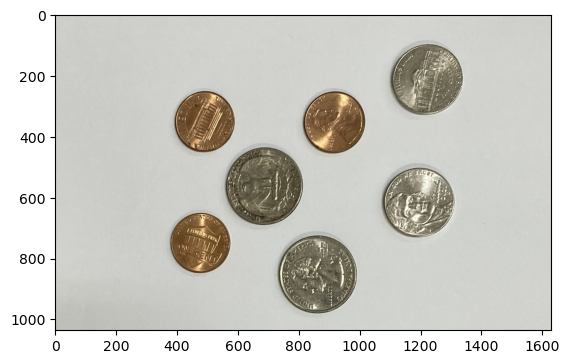

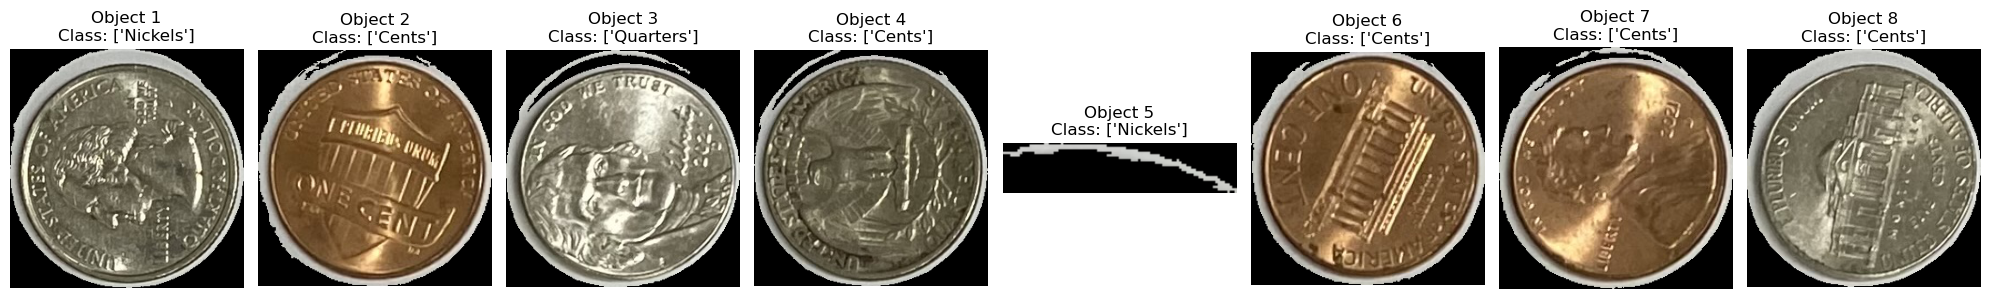

 14%|█▍        | 2/14 [00:04<00:28,  2.39s/it]

Total 91 coins detected. Valid 15 coins detected.
Cropped 1/15
Cropped 2/15
Cropped 3/15
Cropped 4/15
Cropped 5/15
Cropped 6/15
Cropped 7/15
Cropped 8/15
Cropped 9/15
Cropped 10/15
Cropped 11/15
Cropped 12/15
Cropped 13/15
Cropped 14/15
Cropped 15/15


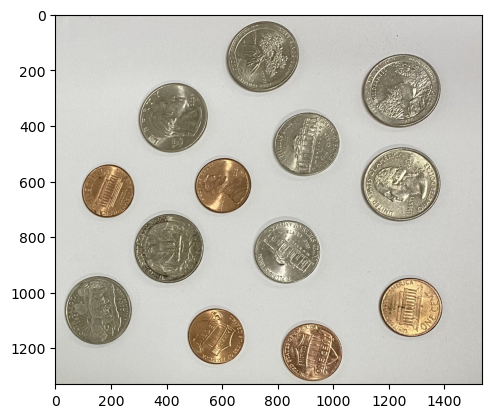

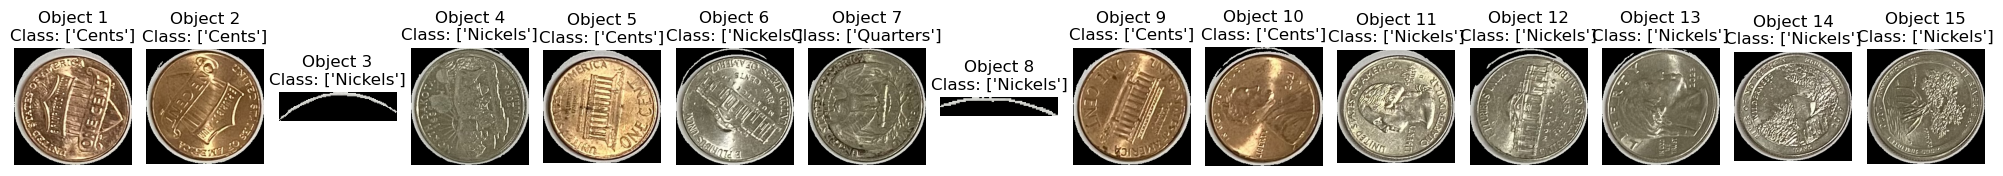

 21%|██▏       | 3/14 [00:10<00:45,  4.13s/it]

Total 32 coins detected. Valid 6 coins detected.
Cropped 1/6
Cropped 2/6
Cropped 3/6
Cropped 4/6
Cropped 5/6
Cropped 6/6


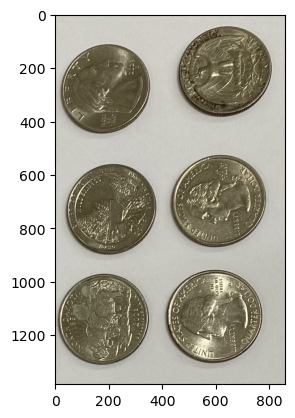

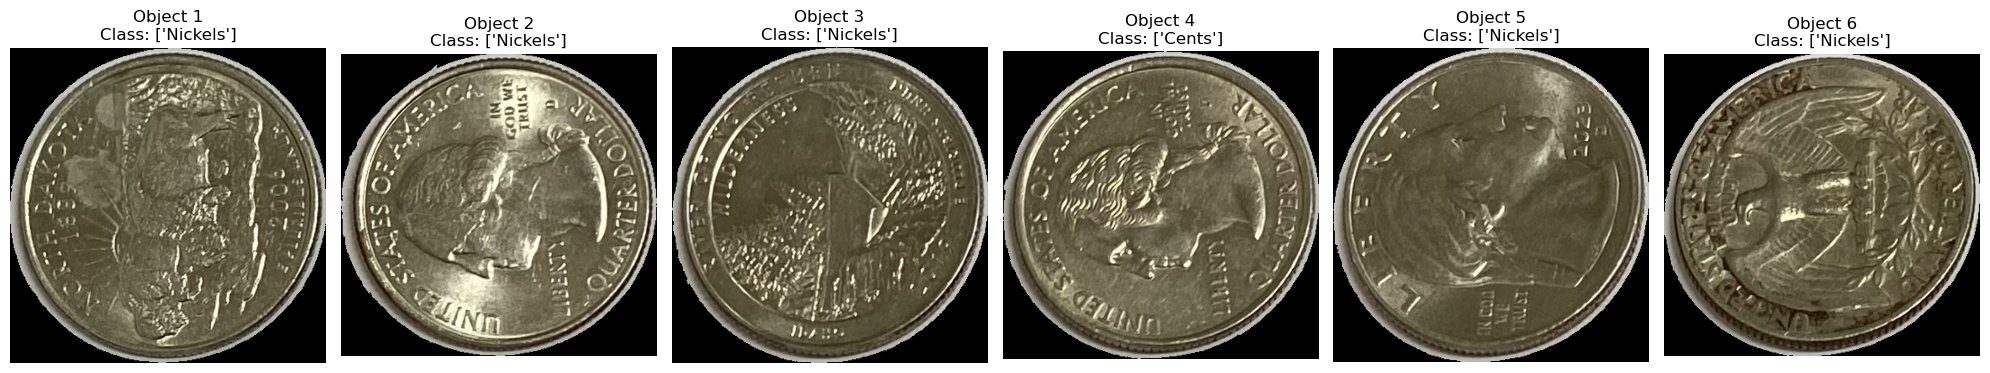

 36%|███▌      | 5/14 [00:16<00:28,  3.13s/it]

 43%|████▎     | 6/14 [00:16<00:17,  2.17s/it]



Total 444 coins detected. Valid 8 coins detected.
Cropped 1/8
Cropped 2/8
Cropped 3/8
Cropped 4/8
Cropped 5/8
Cropped 6/8
Cropped 7/8
Cropped 8/8


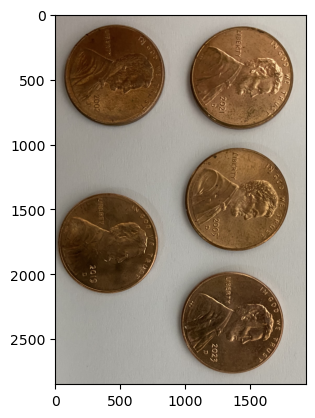

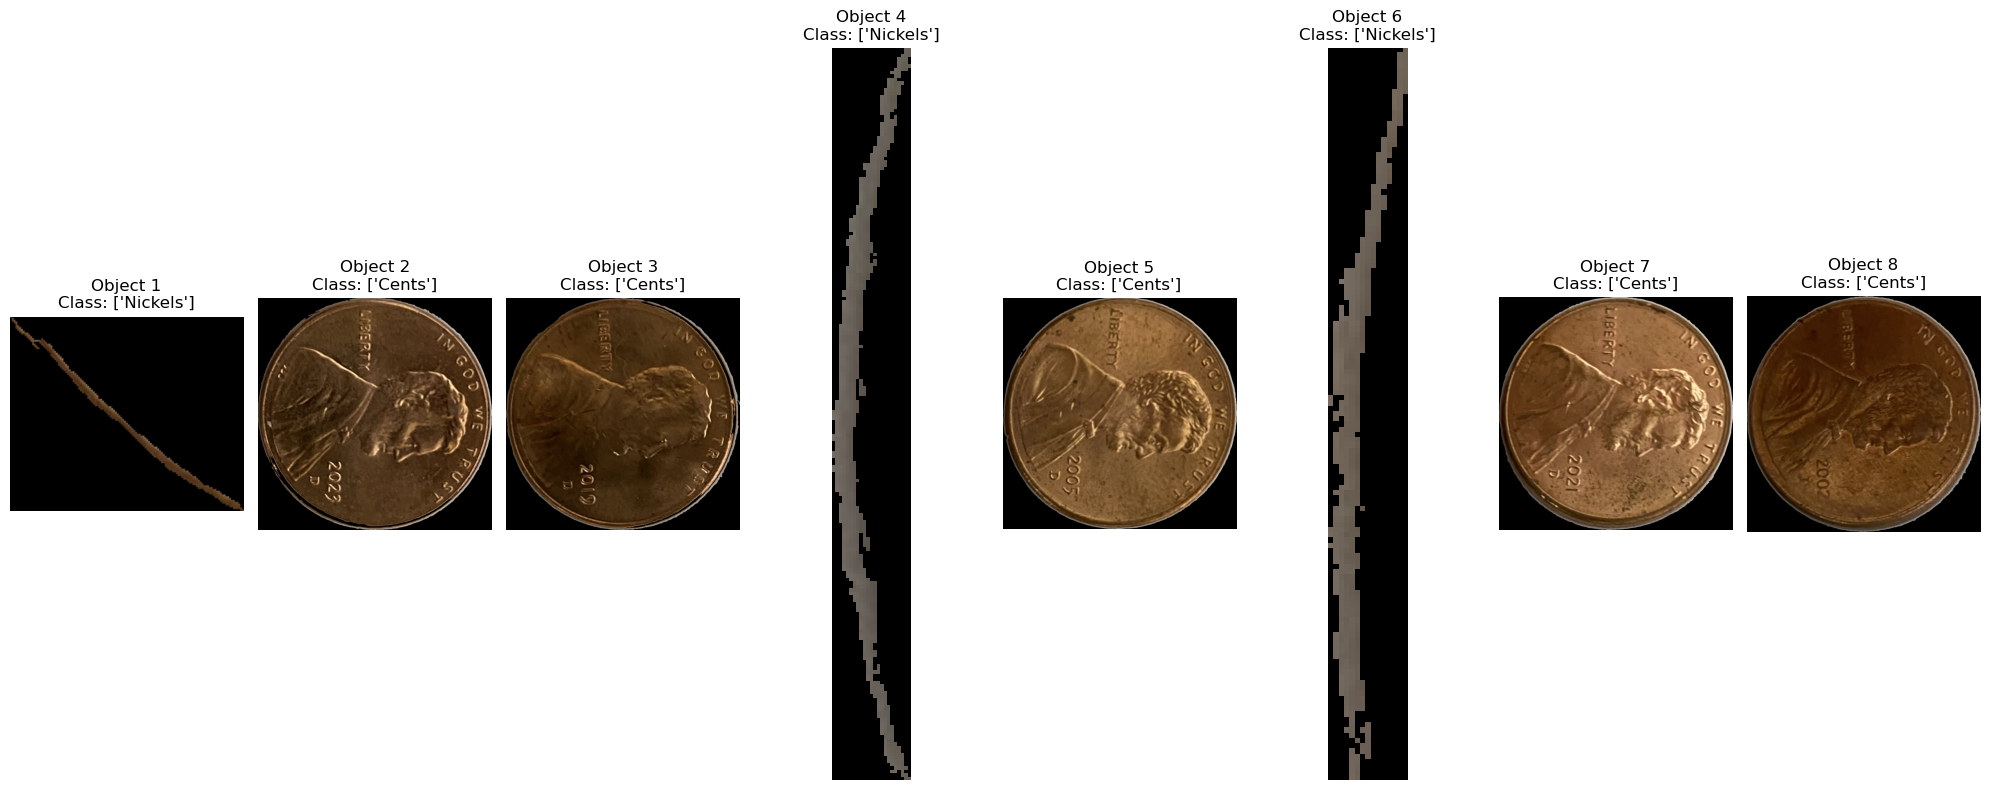

 50%|█████     | 7/14 [00:34<00:51,  7.41s/it]

Total 21 coins detected. Valid 5 coins detected.
Cropped 1/5
Cropped 2/5
Cropped 3/5
Cropped 4/5
Cropped 5/5


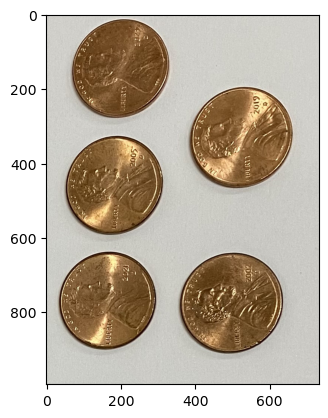

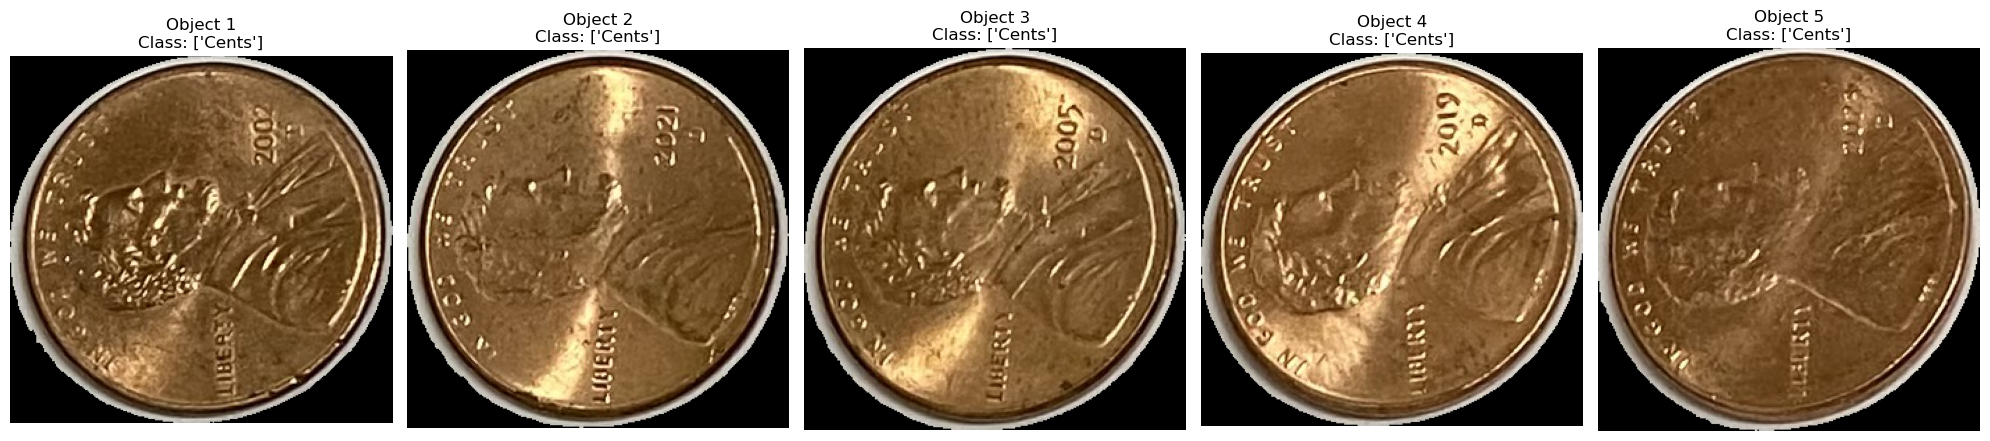

 64%|██████▍   | 9/14 [00:38<00:21,  4.38s/it]



Total 17 coins detected. Valid 5 coins detected.
Cropped 1/5
Cropped 2/5
Cropped 3/5
Cropped 4/5
Cropped 5/5


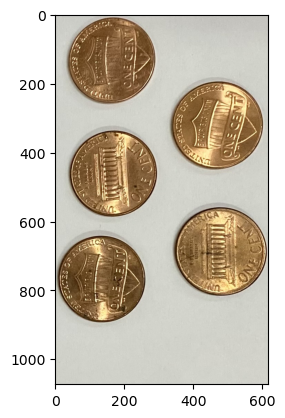

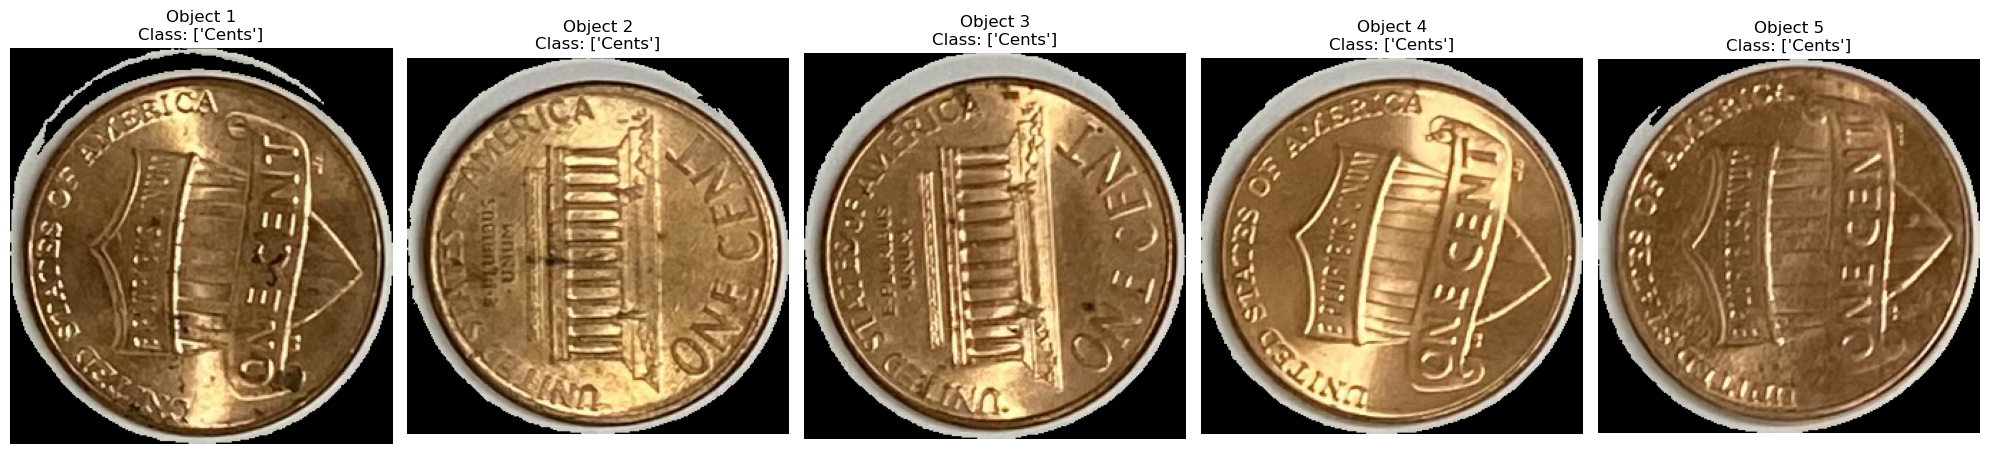

 71%|███████▏  | 10/14 [00:42<00:16,  4.06s/it]

Total 521 coins detected. Valid 2 coins detected.
Cropped 1/2
Cropped 2/2


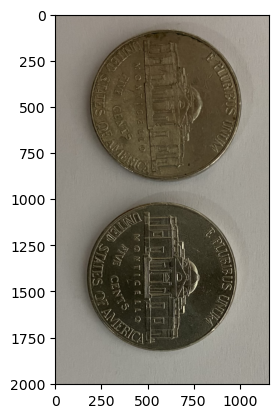

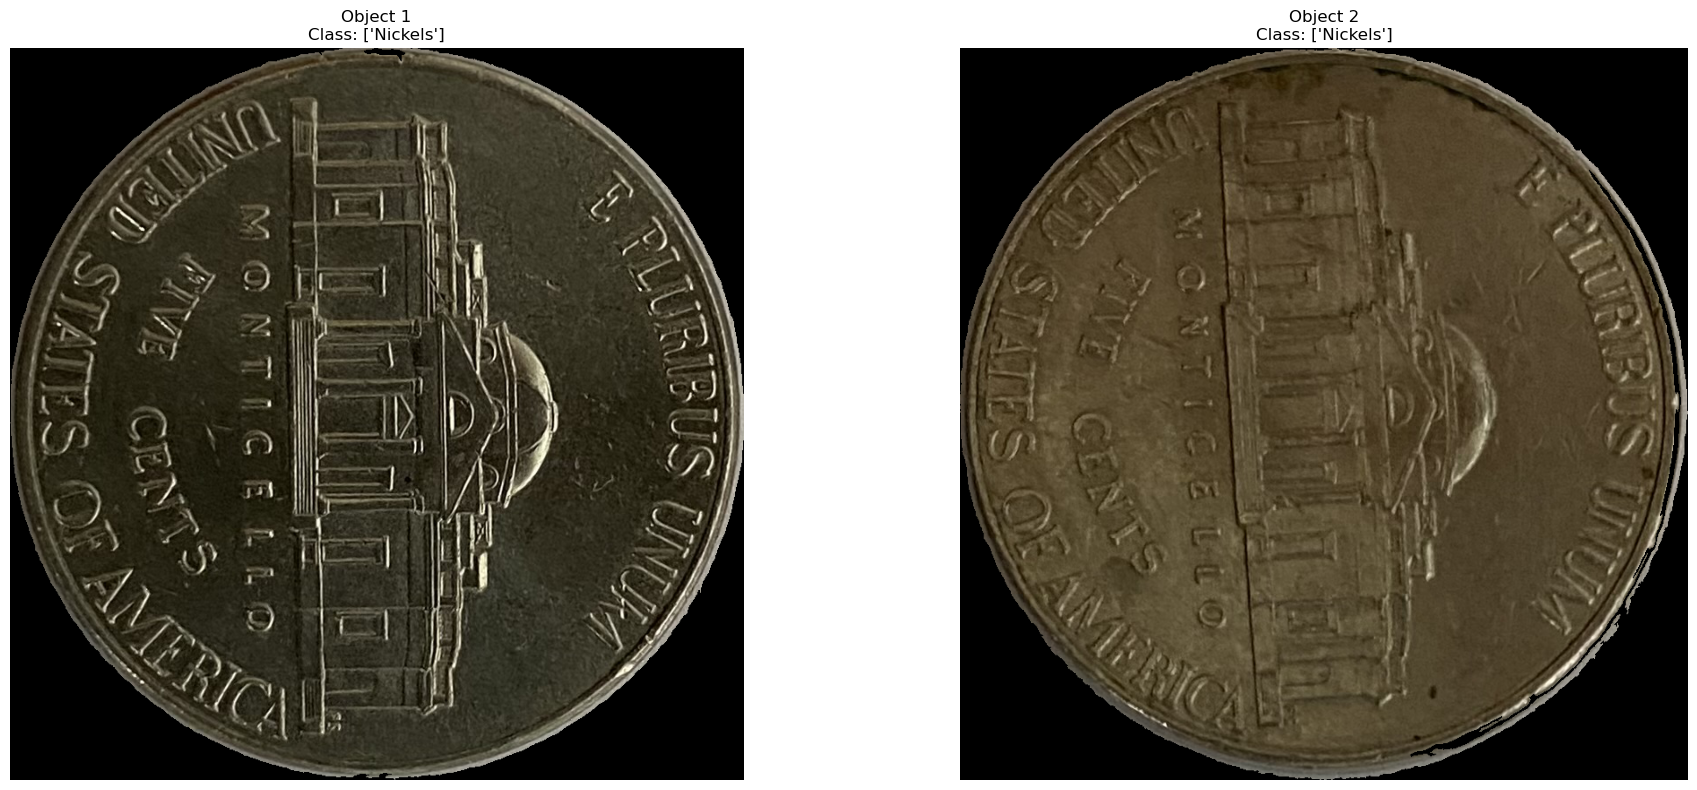

 86%|████████▌ | 12/14 [00:50<00:07,  3.81s/it]

 93%|█████████▎| 13/14 [00:51<00:02,  2.73s/it]

100%|██████████| 14/14 [00:51<00:00,  3.69s/it]

In [7]:
for img_file in tqdm(glob('./real_life_pic/*')):
    try:
        clf_coins(img_file)
    except:
        print("\n")

Total 140 coins detected. Valid 6 coins detected.
Cropped 1/6
Cropped 2/6
Cropped 3/6
Cropped 4/6
Cropped 5/6
Cropped 6/6


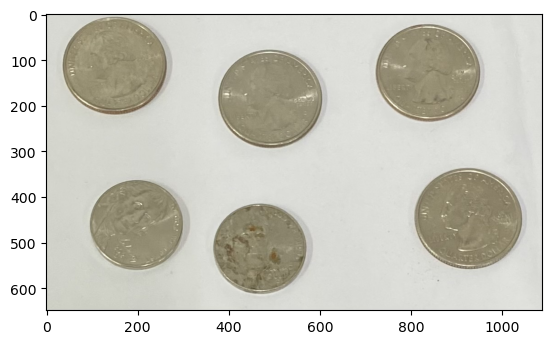

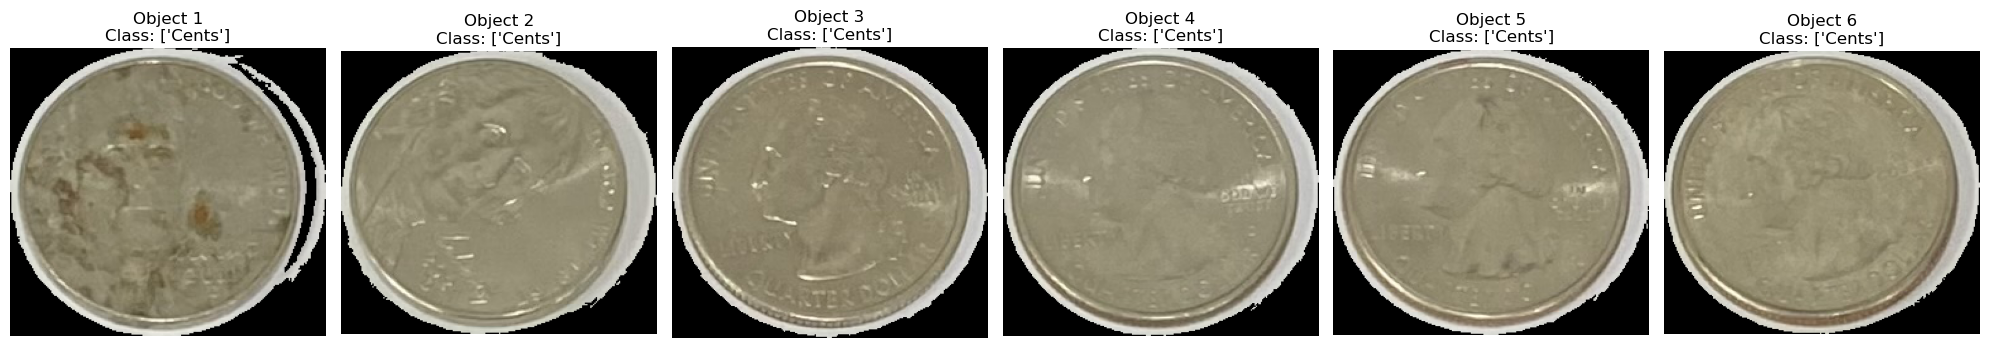

In [28]:
clf_coins('./real_life_pic/IMG_1784.jpg')

In [29]:
clf_coins('./real_life_pic/IMG_1785.jpg')

Exception: Detected valid coins 25/694 [TOO MANY, FAILED]

In [8]:
clf_coins('./real_life_pic/IMG_1783.jpg')

Exception: Detected valid coins 126/1376 [TOO MANY, FAILED]

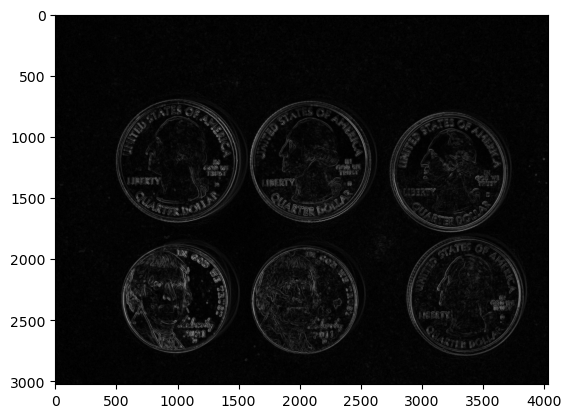

In [31]:
def apply_adaptive_histogram_equalization(image, clip_limit = 1.5, tile_size = (8, 8)):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_image, (17, 17), 0)

    clahe = cv2.createCLAHE(clipLimit = clip_limit, 
                            tileGridSize = tile_size)
    equalized_image = clahe.apply(blur_img)
    
    return equalized_image

image = cv2.imread('./real_life_pic/IMG_1783.jpg')
equalized_img = apply_adaptive_histogram_equalization(image)
gradient_x = cv2.Sobel(equalized_img, cv2.CV_64F, 1, 0, ksize = 3)
gradient_y = cv2.Sobel(equalized_img, cv2.CV_64F, 0, 1, ksize = 3)

# Compute gradient magnitude and orientation
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_orientation = np.arctan2(gradient_y, gradient_x)

plt.imshow(gradient_magnitude, cmap = 'gray')

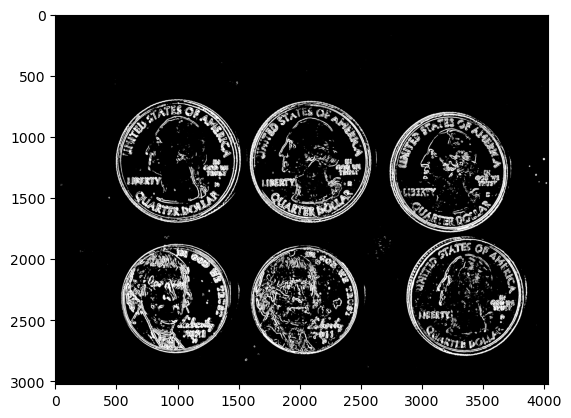

In [27]:
percentage_threshold = 0.1
absolute_threshold = percentage_threshold * np.max(gradient_magnitude)
edges = (gradient_magnitude > absolute_threshold).astype(np.uint8) * 255

plt.imshow(edges, cmap = 'gray')

In [26]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

695
